### Import libraries

In [61]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")

# To supress warnings
import warnings

# date time
from datetime import datetime

warnings.filterwarnings("ignore")

### Customer Metrics

#### Q1:Distribution of Customers across States

In [14]:
custdata= pd.read_csv(r"C:\Users\prasa\OneDrive\Desktop\GreatLearning\SQL\Project\new+wheels_proj\Data\Q1data.csv")
custdata=custdata.sort_values(by='CustomerCount',ascending=False)
gdata=custdata.head()

#### Graph Description: A bar chart to show the top 5 states with most customers. State in the
#### x-axis and Customer Count as the y-axis

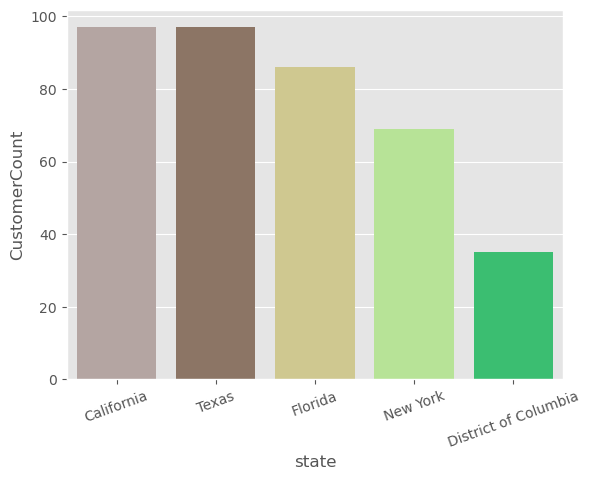

In [49]:
plt.xticks(rotation=20)
#sns.palplot(current_palette)
current_palette = sns.color_palette("terrain_r")
sns.barplot(x=gdata['state'],y=gdata['CustomerCount'],data=gdata,palette = current_palette)
plt.show()

#### Obervations:
#### 1.Two states, California and Texas have high customer count of 97
#### 2.The 4th top state:New York and 5th top state District of Columbia has a big gap of 34

### Q2:Average Customer Ratings by Quarter

Graph Description: bar chart with Quarter Number on the x-axis and the average
customer rating in the y-axis

In [41]:
q2data= pd.read_csv(r"C:\Users\prasa\OneDrive\Desktop\GreatLearning\SQL\Project\new+wheels_proj\Data\Q2data.csv")
q2data.head()

,quarter_number,AvgCustRating
0,1,3.555
1,2,3.355
2,3,2.956
3,4,2.397


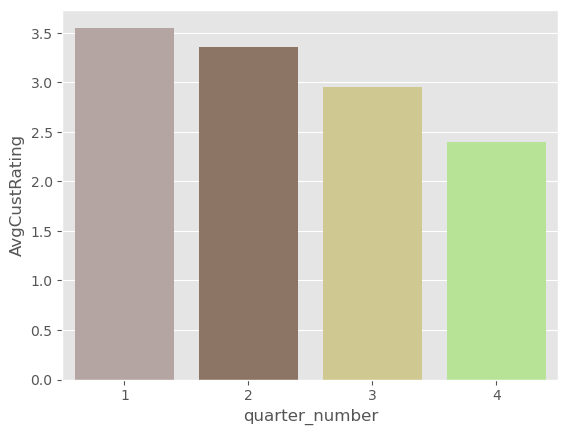

In [108]:

current_palette = sns.color_palette("terrain_r")
sns.barplot(x=q2data['quarter_number'],y=q2data['AvgCustRating'],data=q2data,palette = current_palette)
plt.show()

#### Obervations:
#### 1.The average customer rating for Q1 and Q2 is very close.
#### 2.The average customer rating is declining over the subsequent quarters which means customers are unhappy and it is alarming.

### Q3:Trend of Customer Satisfaction

Graph description: 100% Stacked bar chart with Quarter Number on the x-axis and
percentage split of customer feedback [good, very good, bad, very bad, okay] in the y-axis
with a colour legend

In [107]:
q3data= pd.read_csv(r"C:\Users\prasa\OneDrive\Desktop\GreatLearning\SQL\Project\new+wheels_proj\Data\Q3data.csv")
#q3data.head()
q3data[q3data['customerfeedback']=='Bad']
#q3data['quarter_number']
gdata= pd.DataFrame({'Very Bad':q3data[q3data['customerfeedback']=='Very Bad']['feedback%'],
                     'Bad':q3data[q3data['customerfeedback']=='Bad']['feedback%'],
                     'Okay':q3data[q3data['customerfeedback']=='Okay']['feedback%'],
                     'Good':q3data[q3data['customerfeedback']=='Good']['feedback%'],
                     'Very Good':q3data[q3data['customerfeedback']=='Very Good']['feedback%']
                    } ,index=q3data['quarter_number'].unique())



,Very Bad,Bad,Okay,Good,Very Good
1,NaN,6.352,NaN,NaN,NaN
2,NaN,NaN,16.062,NaN,NaN
3,NaN,NaN,NaN,32.305,NaN
4,NaN,NaN,NaN,NaN,42.196


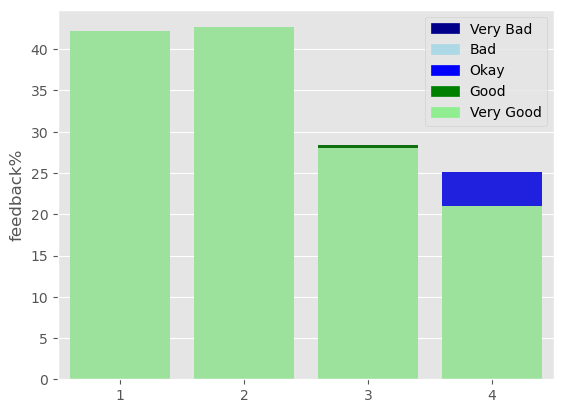

In [109]:
current_palette = sns.color_palette("terrain_r")
#q3data.plot(kind='bar',stacked=True)
#index=q3data['quarter_nnumber']
index=q3data['quarter_number'].unique()
bar1 = sns.barplot(x=index,  y="feedback%", data=q3data[q3data['customerfeedback']=='Very Bad'], estimator=sum, color='darkblue')
bar2 = sns.barplot(x=index,  y="feedback%", data=q3data[q3data['customerfeedback']=='Bad'], estimator=sum, ci=None, color='lightblue')
bar3 = sns.barplot(x=index,  y="feedback%", data=q3data[q3data['customerfeedback']=='Okay'], estimator=sum, ci=None, color='blue')
bar4 = sns.barplot(x=index,  y="feedback%", data=q3data[q3data['customerfeedback']=='Good'], estimator=sum, ci=None, color='green')
bar5 = sns.barplot(x=index,  y="feedback%", data=q3data[q3data['customerfeedback']=='Very Good'], estimator=sum, ci=None, color='lightgreen')
# add legend
b1 = mpatches.Patch(color='darkblue', label='Very Bad')
b2 = mpatches.Patch(color='lightblue', label='Bad')
b3 = mpatches.Patch(color='blue', label='Okay')
b4 = mpatches.Patch(color='green', label='Good')
b5 = mpatches.Patch(color='lightgreen', label='Very Good')

plt.legend(handles=[b1, b2,b3,b4,b5])
# labels for x & y axis
#plt.xlabel('quarter_number')
#plt.ylabel('feedback%')


plt.show()

### Q4: Top Vehicle makers preferred by customers
Graph /Table description :a bar chart with top N vehicle makers on the x-axis and the number of
customers in the y-axise

In [112]:
q4data= pd.read_csv(r"C:\Users\prasa\OneDrive\Desktop\GreatLearning\SQL\Project\new+wheels_proj\Data\Q4data.csv")
q4data=q4data.sort_values(by='customercnt',ascending=False)
q4data.head()

,vehicle_maker,customercnt
0,Chevrolet,83
1,Ford,63
2,Toyota,52
3,Pontiac,50
4,Dodge,50


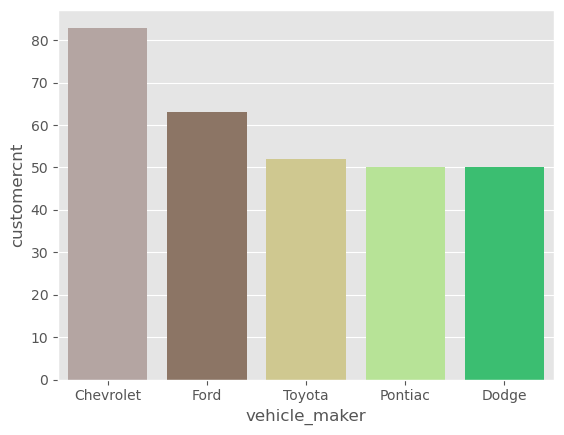

In [114]:
#plt.xticks(rotation=20)
#sns.palplot(current_palette)
current_palette = sns.color_palette("terrain_r")
sns.barplot(x=gdata['vehicle_maker'],y=gdata['customercnt'],data=gdata,palette = current_palette)
plt.show()

#### Obervations:
#### 1. Chevrolet is the most preferred Vehicle maker
#### 2. Toyota,pontiac and Dodge are preferred by almost equal number of customers

### Q5: Most preferred vehicle make in each state
Graph /Table description :a list of states and the with the vehicle make most preferred there in
the form of text or a neatly formatted table

In [118]:
q5data= pd.read_csv(r"C:\Users\prasa\OneDrive\Desktop\GreatLearning\SQL\Project\new+wheels_proj\Data\Q5data.csv")
q5data

,state,vehicle_maker
0,Alabama,Dodge
1,Alaska,Chevrolet
2,Arizona,Pontiac
3,Arizona,Cadillac
4,Arkansas,Suzuki
...,...,...
138,Wisconsin,Nissan
139,Wisconsin,Cadillac
140,Wisconsin,Dodge
141,Wisconsin,Honda


#### Obervations:
#### 1.States like Arizona, Wisconsin have more than one most preferred vehicle maker
#### 2. The distribution of top vehicle makers shows chevrolet is most preferred and also the customer preference is highly distributed in some states

### Q6: Trend of purchases by Quarter
Graph  :You can use a line chart with Quarter Number in the x-axis and No of Orders in the
y-axis

In [119]:
q6data= pd.read_csv(r"C:\Users\prasa\OneDrive\Desktop\GreatLearning\SQL\Project\new+wheels_proj\Data\Q6data.csv")
q6data.head()

,quarter_number,OrdersCount
0,4,199
1,1,310
2,3,229
3,2,262


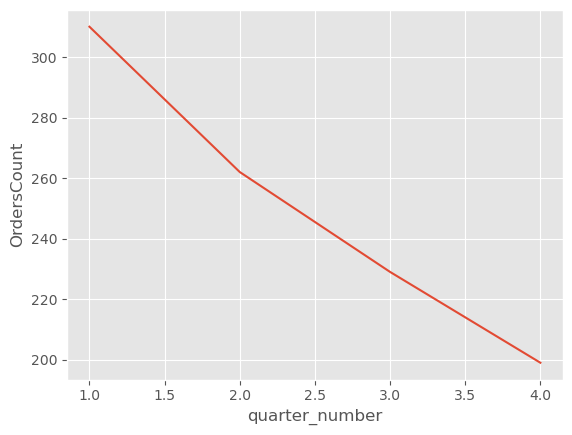

In [120]:
current_palette = sns.color_palette("terrain_r")
sns.lineplot(x=q6data['quarter_number'],y=q6data['OrdersCount'],data=q6data,palette = current_palette)
plt.show()

#### Obervations:
#### 1.The orders count is steadiy declining quarter by quarter which is alamring


### Q7: Quarter on Quarter % change in Revenue
Graph  :line chart with Quarter Number in the x-axis and revenue in the y-axis,
and give the % change as text at each point, OR you can just have a neatly formatted table
with the % changes, if that would look cleaner

In [122]:
q7data= pd.read_csv(r"C:\Users\prasa\OneDrive\Desktop\GreatLearning\SQL\Project\new+wheels_proj\Data\Q7data.csv")
q7data.head()

,quarter_number,QoQ%
0,1,0.000
1,2,-27.226
2,3,-32.315
3,4,-3.481


#### Obervations:
#### 1. The Quarter on Quarter revenue is declining by huge margin for Q2 and Q3 
#### 2: In Q4, The decline % was managed at 3% compared to previous quarters

### Q8: Trend of Revenue and Orders by Quarter
Graph  :a dual axis line chart with Quarter Number in the x-axis, and Revenue
as the 1st y-axis and Orders as the 2nd y-axis in the same chart.

In [123]:
q8data= pd.read_csv(r"C:\Users\prasa\OneDrive\Desktop\GreatLearning\SQL\Project\new+wheels_proj\Data\Q8data.csv")
q8data.head()

,quarter_number,netRevenue,noofOrders
0,1,18032549.900,310
1,2,13122995.756,262
2,3,8882298.845,229
3,4,8573149.281,199


#### Obervations:
#### 1. The Quarter on Quarter revenue is declining by huge margin for Q2 and Q3 
#### 2:  The number or orders almost decreased by 30% by Q4 which is very alarming

### Q9: Average discount offered by Credit Card type
Graph/Table  :a bar chart with Card Types on the x-axis and average discount offered
in the y-axis OR a well formatted table can convey the message

In [126]:
q9data= pd.read_csv(r"C:\Users\prasa\OneDrive\Desktop\GreatLearning\SQL\Project\new+wheels_proj\Data\Q9data.csv")
q9data

,credit_card_type,AvgDiscount
0,laser,0.644
1,mastercard,0.629
2,maestro,0.624
3,visa-electron,0.623
4,china-unionpay,0.622
5,instapayment,0.621
6,americanexpress,0.616
7,diners-club-us-ca,0.615
8,diners-club-carte-blanche,0.614
9,switch,0.610


#### Obervations:
#### 1. Highest avg discount for lasers credit card 
#### 2:  Lowest avg discount for diners-club-international credit card 

### Q10: Time taken to ship orders by Quarter
Graph/Table  :make a bar chart with Quarter Number on the x-axis and average time to ship
in the y-axifile

In [128]:
q10data= pd.read_csv(r"C:\Users\prasa\OneDrive\Desktop\GreatLearning\SQL\Project\new+wheels_proj\Data\Q10data.csv")
q10data

,quarter_number,AvgNoofDaysToShip
0,4,175
1,1,58
2,3,118
3,2,72


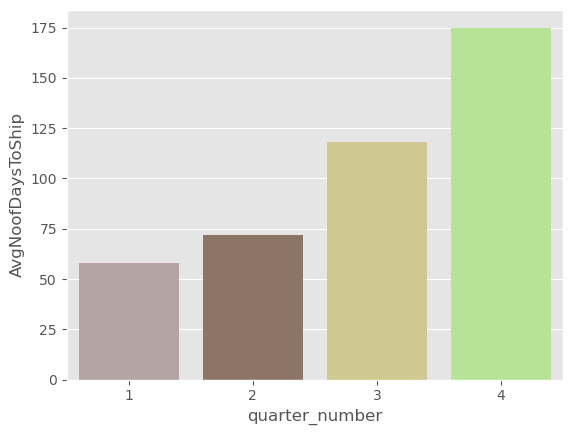

In [129]:
current_palette = sns.color_palette("terrain_r")
sns.barplot(x=q10data['quarter_number'],y=q10data['AvgNoofDaysToShip'],data=q10data,palette = current_palette)
plt.show()

#### Obervations:
#### 1. Average no of days to ship increases to 175 days for Q4 which is very alarming

### Insights and Recommendations

1. Customer satisfcation has decreased quarter by quarter
2. Delay in shipping might be a reason for the decreased orders and revenue.